In [7]:
import matplotlib as mpl
from matplotlib import pyplot as plt

from utils import degree_per_protein
from datasets import (load_Y2H_union_25, 
                      load_lit_bm_24, 
                      load_I3D_exp_24, 
                      load_AlphaFold_RoseTTAFold,
                      load_all_orfs)
from plotting import (degree_distribution_plot, 
                      COLOR_I3D, 
                      COLOR_ALPHAFOLD_ROSETTAFOLD, 
                      COLOR_LIT, 
                      COLOR_Y2H,
                      savefig)

In [8]:
mpl.rcParams['font.size'] = 7.
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['savefig.dpi'] = 500

In [9]:
abbi = load_Y2H_union_25(remove_homodimers=True)
litbm = load_lit_bm_24(remove_homodimers=True)
i3d = load_I3D_exp_24(remove_homodimers=True)
afrf = load_AlphaFold_RoseTTAFold(remove_homodimers=True,
                                  restrict_to_high_confidence=True)

NOTE: dropping 6 pairs with missing ORF names


/Users/lukelambourne/work/yeri_paper_figures/notebooks/plotting.py:1372: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0f}'.format(x) for x in ax.get_xticks()])
/Users/lukelambourne/work/yeri_paper_figures/notebooks/plotting.py:1372: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0f}'.format(x) for x in ax.get_xticks()])
/Users/lukelambourne/work/yeri_paper_figures/notebooks/plotting.py:1372: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0f}'.format(x) for x in ax.get_xticks()])
/Users/lukelambourne/work/yeri_paper_figures/notebooks/plotting.py:1372: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0f}'.format(x) for x in ax.get_xticks()])


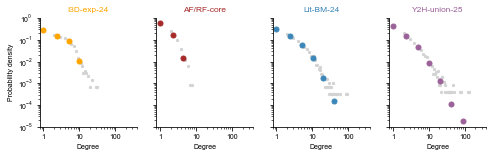

In [10]:
nws = [i3d, afrf, litbm, abbi, ]
colors = [COLOR_I3D, COLOR_ALPHAFOLD_ROSETTAFOLD, COLOR_LIT, COLOR_Y2H]
names = ['I3D-exp-24', 'AF/RF-core', 'Lit-BM-24', 'Y2H-union-25']
fig, axs = plt.subplots(1, len(nws), sharey=True)
fig.set_size_inches(h=2, w=2 * len(nws))
for nw, color, name, ax in zip(nws, colors, names, axs):
    degree_distribution_plot(nw, 
                            'orf_name_a', 'orf_name_b',
                             print_fit_summary=False,
                             ax=ax, 
                             do_fit=False,
                             color=color,
                             grey_dot_size=5,
                             markersize=5)
    ax.set_title(name, color=color)
    
for ax in axs.flatten():
    ax.set_xlim(0.8, 400)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_yticks([10**-x for x in range(6)])
    ax.set_yticks([y * 10**-x for x in range(6) for y in range(1, 10)], minor=True)
    ax.set_ylim(0.00001, 1)
for ax in axs[1:]:
    ax.set_ylabel('')
#axs[0].set_yticks([10**-x for x in range(6)])
#plt.subplots_adjust(wspace=0.4)
savefig('degree_distributions_high-quality-binary-nws')

In [11]:
for nw in nws:
    d = degree_per_protein(nw, 'orf_name_a', 'orf_name_b')
    print(d.max(), d.idxmax(), (d == d.max()).sum())

31.0 YHR165C 1
8.0 YIL093C 1
92.0 YMR116C 1
134.0 YLR291C 1


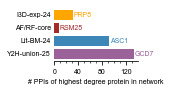

In [12]:
values = [degree_per_protein(nw, 'orf_name_a', 'orf_name_b').max() for nw in nws]
orf_to_gene_name = load_all_orfs().set_index('orf_name')['gene_name']
names = [orf_to_gene_name[degree_per_protein(nw, 'orf_name_a', 'orf_name_b').idxmax()] for nw in nws]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(w=1.5, h=1)
ax.barh(y=['I3D-exp-24', 'AF/RF-core', 'Lit-BM-24', 'Y2H-union-25'],
        width=values,
        color=[COLOR_I3D, COLOR_ALPHAFOLD_ROSETTAFOLD, COLOR_LIT, COLOR_Y2H]
        )
offset = 1
ax.text(s=names[0], x=values[0] + offset, y=0, color=COLOR_I3D, va='center', ha='left')
ax.text(s=names[1], x=values[1] + offset, y=1, color=COLOR_ALPHAFOLD_ROSETTAFOLD, va='center', ha='left')
ax.text(s=names[2], x=values[2] + offset, y=2, color=COLOR_LIT, va='center', ha='left')
ax.text(s=names[3], x=values[3] + offset, y=3, color=COLOR_Y2H, va='center', ha='left')
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('# PPIs of highest degree protein in network')
for loc in ['left', 'right', 'top']:
    ax.spines[loc].set_visible(False)
ax.yaxis.set_tick_params(length=0)
ax.set_xticks(range(0, 121, 40))
ax.set_xticks(range(0, 131, 10), minor=True)
fig.savefig('../figures/biggest-hub_bar.pdf',
            bbox_inches='tight')